# 파이썬 panda : IMDB 튜토리얼

## 1. pandas 시작하기

### 설치와 import

`conda install pandas`

또는 

`pip install pandas`

In [0]:
# !pip install pandas

In [0]:
import pandas as pd
import numpy as np

## 2. pandas: Series and DataFrames

pandas에는 `Series`와 `DataFrame` 데이터 구조가 있다. 

`Series`는 하나의 칼럼, `DataFrame`은 Series가 여러개 겹쳐있는 테이블로 구성 


### - DataFrames 생성하기

- 가장 간단하게 `dict` 딕셔너리로 생성 


In [0]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

In [0]:
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


**딕셔너리와 데이터프레임**

- 각각의*(key, value)*은`data`에서  *column*으로 매칭

- pandas에서 별도의 `Index`를 지정하지 않으면 숫자로 생성되고, index를 문자열로 지정할 수 있다.

In [0]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


 - **loc**로 value를 확인

In [0]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

## 3. Data 읽기와 불러오기


###  - CSVs 파일 불러오기

In [0]:
df = pd.read_csv('IMDB/purchases.csv')
df

- CSVs은 보통 index가 없기 때문에 특정 열을 index로 지정하고 싶으면 `index_col` 인수로 지정

In [0]:
df = pd.read_csv('IMDB/purchases.csv', index_col=0)

df

### - JSON 파일 불러오기

- 파이썬에서 JSON 파일은 필수적으로`dict` 딕셔너리 형식이라 pandas는 쉽게 불러올 수 있다.

In [0]:
df = pd.read_json('IMDB/purchases.json')

df

### - SQL DB에서 불러오기

- sql로 불러오려면 우선 `pysqlite3`를 설치한다.
- `pysqlite3`는 Jupyter notebook에서 sql 쿼리를 불러올 수 있다.

`pip install pysqlite3`

In [0]:
!pip install pysqlite3

- `sqlite3`는  `SELECT`를 통해 데이터프레임을 만들어준다.
- `sqlite3`를 import 해보자

In [0]:
import sqlite3

con = sqlite3.connect('IMDB/database.db')

In [0]:
df = pd.read_sql_query("SELECT * FROM purchases", con)

df

- CSVs 파일을 불러오는 것처럼 `index_col='index'` 인자를 사용한다.
- `set_index()`를 사용하면 쉽게 해당 열을 index로 지정할 수 있다.

In [0]:
df = df.set_index('index')

df

###  - CSV, JSON, SQL 파일로 전환하기

In [0]:
df.to_csv('IMDB/new_purchases.csv')

df.to_json('IMDB/new_purchases.json')

df.to_sql('IMDB/new_purchases', con)

When we save JSON and CSV files, all we have to input into those functions is our desired filename with the appropriate file extension. With SQL, we’re not creating a new file but instead inserting a new table into the database using our `con` variable from before.


## 4. DataFrame 주요 기능 다루기


- IMDB movies 데이터셋으로 실습

In [8]:
import os
os.getcwd()

'/content'

In [0]:
# Movie Title을 index 지정
movies_df = pd.read_csv('./drive/My Drive/Colab Notebooks/00.NeedToCheck/datas/IMDB/IMDB-Movie-Data.csv', index_col='Title')

### - Data 살펴보기

- `.head() `, `.tail()` 사용하기
- `.head(10) `, `.tail(10)` 사용하기

In [58]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [59]:
movies_df.tail(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


### - Data의 자세한 정보 얻기

- `.info()` 메서드를 사용

In [60]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


-`.shape` 속성을 알기 위해 실행하면  (rows, columns)로 반환

In [61]:
movies_df.shape

(1000, 11)

### - duplicates 중복만들기

- append()를 사용하여 전체 행을 중복 두개로 만들기 

In [62]:
temp_df = movies_df.append(movies_df)
temp_df.shape

(2000, 11)

- drop_duplicates()로 생성한 중복 행을 삭제하기

In [63]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(1000, 11)

- pandas의 DataFrame은 data 복제 시 중복과 삭제를 쉽게 하기 위해 항상 `inplace=True` 인자를 사용한다.

In [64]:
temp_df.drop_duplicates(inplace=True)
temp_df.shape

(1000, 11)

`inplace=True` 인자를 사용하면 자동적으로`temp_df`는  자동적으로 전환된다. 

- 인자의 사용에 따라 `drop_duplicates()` is `keep`, 

* `first`: 디폴트로 첫번째 데이터만 빼고 drop 한다.
* `last`: 마지막 데이터만 빼고 drop 한다.
* `False`: 모든 중복 데이터를 삭제한다.

`keep`,은 모든 중복 데이터를 삭제한다. 복제 후 두 데이터가 동일하면 keep=False 인자는 모든 데이터를 삭제한다.

In [65]:
temp_df = movies_df.append(movies_df)  # 새로운 데이터프레임 복사

temp_df.drop_duplicates(inplace=True, keep=False)

temp_df.shape

(0, 11)

Since all rows were duplicates, `keep=False` dropped them all resulting in zero rows being left over. If you're wondering why you would want to do this, one reason is that it allows you to locate all duplicates in your dataset. When conditional selections are shown below you'll see how to do that.

### - 열(Column) 정의하기

In [66]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

- `.rename()` 메서드로 열이름(Feature) 변경, 이때`dict`딕셔너리 사용

In [67]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

- pandas의 데이터프레임은 `.rename()`을 사용하지 않고 리스트를 사용하여 아래처럼 변경 가능

In [68]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

- lower() 메서드를 사용하여 for List Comprehension으로 문자열을 모두 소문자로 변경 

In [69]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

### - 결측치 처리하기

- 결측치(missing, null values)를 처리할 때는 파이썬의 `None`과 NumPy의 `np.nan`을 사용

데이터프레임에서 Null 처리의 방법은

1. Null 값 삭제
2. 새로운 값으로 변경 (imputation)


In [70]:
movies_df.isnull().head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False


- `isnull()`은 데이터프레임에서 Boolean 연산을 한다.

- 여기에 `sum()` 메서드로 각 열의 결측치 합을 반환한다. 

In [71]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

#### 결측치 삭제

- `dropna()` 메서드로 삭제

In [72]:
movies_df.dropna()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Resident Evil: Afterlife,994,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0


-  `inplace=True` 인자 사용 
- 열(columns)의 삭제는 `axis=1` 인자 사용
- `axis=1`은 Numpy를 기반으로 했을 때 shape(  , )에서 0은 행, 1은 열을 의미하기 때문이다.

In [73]:
movies_df.dropna(axis=1)

,rank,genre,description,director,actors,year,runtime,rating,votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699


In [74]:
movies_df.shape

(1000, 11)

### - Imputation - 대체값 넣기

- 결측치에  **mean** 또는 **median**을 채워준다.

In [0]:
# 하나의 열을 선택하여 revenue에 넣기
revenue = movies_df['revenue_millions']

- 하나의 열을 선택해서 새로운 변수에 넣으면 `revenue`는 `Series`가 된다.

In [76]:
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

In [77]:
revenue_mean = revenue.mean()

revenue_mean

82.95637614678897

- Null 값에 `fillna()` 메서드로 평균값을 채우기

In [0]:
revenue.fillna(revenue_mean, inplace=True)

- `inplace=True` 인자를 넣어서 원래  `movies_df`까지 적용 시킨다

In [79]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

### - 변수(variables) 이해하기

- `describe()` 메서드로 연속 변수들의 기본 통계(Statistics) 알아보기

In [80]:
movies_df.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [81]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

- `.value_counts()`로 각 열(column)의 value 수를 알아보기

In [82]:
movies_df['genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Comedy,Drama                  27
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: genre, dtype: int64

#### 연속변수의 상관관계 알아보기

- `.corr()` 메서드로 각 변수들의 상관관계를 알 수 있다.

In [83]:
movies_df.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


## 5. DataFrame의 slicing, selecting, extracting

### - By column(열)

In [84]:
genre_col = movies_df['genre']

type(genre_col)

pandas.core.series.Series

- 하나의 열을 선택해서 리스트 [ ]로 하면 *Series*로 반환
- 두개 이상의 열을 선택하여 중복 [[ ]]로 하면 *DataFrame*으로 반환

In [85]:
genre_col = movies_df[['genre']]

type(genre_col)

pandas.core.frame.DataFrame

In [86]:
subset = movies_df[['genre', 'rating']]

subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


### - By rows(행)

행의 경우 두개의 선택이 있다. 

- `.loc` - **loc** index name(이름)으로 지정
- `.iloc`- **loc** number **i**ndex 지정

- 이번 실습은 index를 movie Title로 했기 때문에  `.loc`를 사용해야 한다.

In [87]:
prom = movies_df.loc["Prometheus"]

prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

In [0]:
prom = movies_df.iloc[1]

- `loc`와 `iloc`의 복수의 행을 선택 시는 파이썬의 `list` 슬라이싱을 사용하는 것과 유사하다.


In [89]:
movie_subset = movies_df.loc['Prometheus':'Sing']

movie_subset = movies_df.iloc[1:4]

movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


- `.iloc`을 사용할 때,  [1:4]로 선택하면 맨 뒤의 숫자 4는 선택되지 않는다. 

### - 조건 선택 (Boolean Condition)
- 조건 연산으로 DataFrame을 소환하거나 선택할 수 있다.

In [90]:
condition = (movies_df['director'] == "Ridley Scott")

condition.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: director, dtype: bool

In [91]:
# director 열에서 Ridley Scott 감독의 영화들을 데이터프레임으로 반환
movies_df[movies_df['director'] == 'Ridley Scott'].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


- 특정 수치값을 조건 연산으로 Boolean 조건도 가능하다

In [92]:
movies_df[movies_df['rating'] >= 8.6].head(3)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


- OR 연산자인 `|`과 AND  `&`를 적용하여 사용

In [93]:
# Christoper Nolan과 Ridley Scott 감독의 영화를 OR 연산자로 적용하여 데이터프레임으로 반환
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


- `isin()` 메서드도 동일한 기능으로 데이터프레임을 반환한다.

In [94]:
movies_df[movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


- 2005년과 2010년에 개봉한 영화 중에 평점이 8.0 이상이고, 25% 이하의 수익율을 낸 영화를 조건연산으로 데이터프레임을 반환하려면,

In [95]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


## 6. Apply( ) 기능 사용하기

- DataFrame과 Series는 리스트로 사용하기 때문에, Dataset이 커지면 연산 속도가 느려진다.

-  `apply() 함수를 사용하면 복수의 Function을 빠르게 적용할 수 있다.

In [0]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

 - `apply()`를 사용하면 간단하게 표현할 수 있다

In [97]:
movies_df['rating_category'] = movies_df['rating'].apply(rating_function)

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


- `.apply()`와 `lambda`를 조합해서 사용하면 for문을 함수처럼 적용 가능하다. 
- 파이썬에서 "lambda" 는 런타임에 생성해서 사용할 수 있는 익명 함수이다.
- lambda는 쓰고 버리는 일시적인 함수로 생성된 곳에서만 적용한다.

In [98]:
movies_df['rating_category'] = movies_df['rating'].apply(lambda x: 'good' if x >= 8.0 else 'bad')

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


- pandas는 Vectorization에 최적화 됐기 때문에`apply()`를 사용하면 수동으로 사용하는 반복문 보다 훨씬 빠른 속도로 연산할 수 있다.

## 7. pandas Plotting 시각화

pandas는 시각화 패키지인 Matplotlib을 기반으로 데이터프레임과 시리즈의 시각화를 제공한다. 

In [0]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # 폰트와 figure 사이즈 설정

- 카테고리 변수(categorical variables)는 일반적으로  Bar Charts*와 Boxplots을 사용한다.
- 연속형 변수(continuous variables)는  Histograms, Scatterplots, Line graphs, Boxplots을 사용한다.

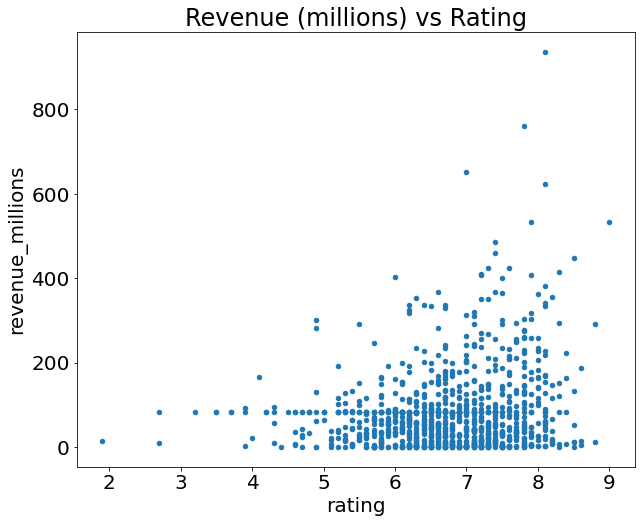

In [100]:
# plot( )으로 시각화 하기
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

Jupyter Notebook에서는  plot의 속성`<matplotlib.axes._subplots.AxesSubplot at 0x26613b5cc18>`이 생략된다.

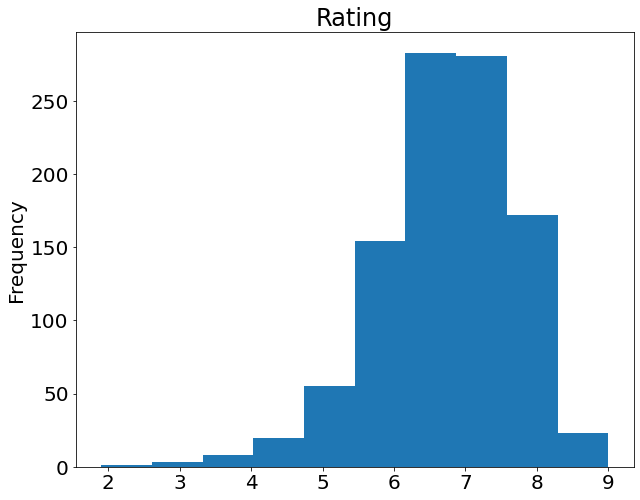

In [101]:
# 'rating'을 히스토그램으로 시각화
movies_df['rating'].plot(kind='hist', title='Rating');

In [102]:
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

- Boxplot을 사용하면 Quantile로 시각화 한다.

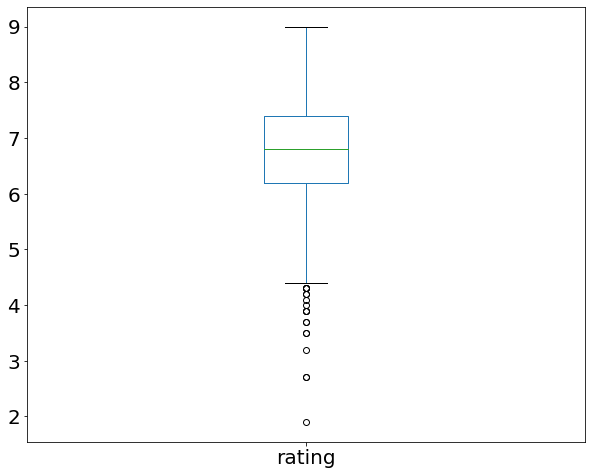

In [103]:
movies_df['rating'].plot(kind="box");

<figure>
<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif" />
    <figcaption>Source: *Flowing Data*</figcaption>
</figure>


- 카테고리 변수와 연속형 변수를 함께 시각화 할 때는 아래처럼 표현 가능하다.

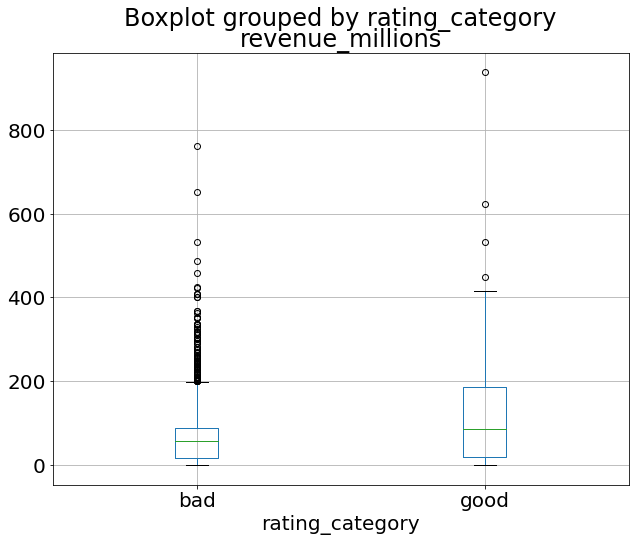

In [104]:
movies_df.boxplot(column='revenue_millions', by='rating_category');

pandas 시각화를 더 알고 싶다면 참조
`plot()` **[docs here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)**

## 8. 마무리하며 Wrap-up



- pandas 사이트를 방문하면  더 많은 튜토리얼 확인할 수 있습니다. [extensive tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) 
- 또한 Kaggle은 전처리와 EDA의 커널의 천국입니다. [Kaggle kernels](https://www.kaggle.com/kernels)